[source](https://www.kaggle.com/datasets/tugberkkaran/used-car-listings-features-and-prices-carscom?select=test.csv)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer

In [ ]:
# Create function to create line plot of predicted values vs actual values
def graph_test_accuracy(y_test, y_pred, rmse):
    plt.figure(figsize=(6,4))
    x_ax = range(len(y_test)) # determine range of x-axis based of len of y_test
    plt.plot(x_ax, y_test, linewidth=1, label="original", alpha=0.9)
    plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted", alpha=0.9)
    plt.title(f"y-test and y-predicted data (rmse = {rmse:.2f})")
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(fancybox=True, shadow=True, loc='best')
    plt.grid(True)
    plt.show()

 # add scatterplot that plots variance between predicted and actual values
    plt.figure(figsize=(6,4))
    variance=y_test-prediction # create dataframe of the difference between actual values and prediction
    sns.scatterplot(variance)
    plt.axhline(y = 0, color = 'r', linestyle = '--') # horizantal line that indicates where there is 0 variance
    plt.title('Difference between Predictions and Actual')
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

In [ ]:
used=pd.read_csv('/content/drive/MyDrive/Used Car Listings.csv')
used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23887 entries, 0 to 23886
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        23884 non-null  object 
 1   model                        23884 non-null  object 
 2   year                         23884 non-null  float64
 3   mileage                      23884 non-null  float64
 4   engine                       23833 non-null  object 
 5   engine_size                  22353 non-null  float64
 6   transmission                 23764 non-null  object 
 7   automatic_transmission       23884 non-null  float64
 8   fuel_type                    23884 non-null  object 
 9   drivetrain                   23884 non-null  object 
 10  min_mpg                      20135 non-null  float64
 11  max_mpg                      20135 non-null  float64
 12  damaged                      23663 non-null  float64
 13  first_owner     

In [ ]:
used.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595


In [ ]:
used.isnull().sum()

brand                             3
model                             3
year                              3
mileage                           3
engine                           54
engine_size                    1534
transmission                    123
automatic_transmission            3
fuel_type                         3
drivetrain                        3
min_mpg                        3752
max_mpg                        3752
damaged                         224
first_owner                     395
personal_using                  246
turbo                             3
alloy_wheels                      3
adaptive_cruise_control           3
navigation_system                 3
power_liftgate                    3
backup_camera                     3
keyless_start                     3
remote_start                      3
sunroof/moonroof                  3
automatic_emergency_braking       3
stability_control                 3
leather_seats                     3
memory_seat                 

In [ ]:
used['year'].describe()

count    23884.000000
mean      2017.765701
std          4.975234
min       1953.000000
25%       2016.000000
50%       2019.000000
75%       2021.000000
max       2024.000000
Name: year, dtype: float64

In [ ]:
used[used['year']<1900]

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price


In [ ]:
used=used[used['year']>1900]

Text(0, 0.5, '')

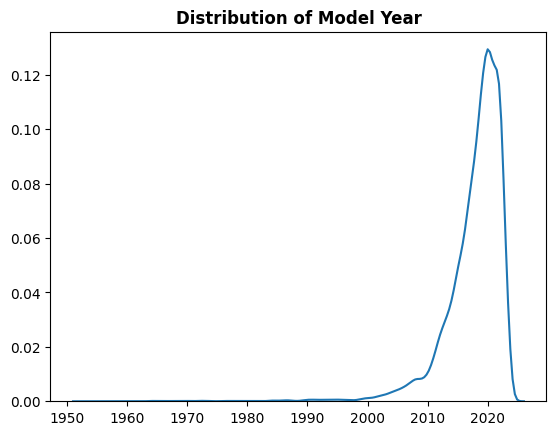

In [ ]:
sns.kdeplot(used['year'])
plt.title('Distribution of Model Year', weight='bold')
plt.xlabel('')
plt.ylabel('')

In [ ]:
used['age_years']=abs(2023-used['year']).astype(np.uint8)


Text(0.5, 1.0, 'distribution of Age of Vehicles in Years')

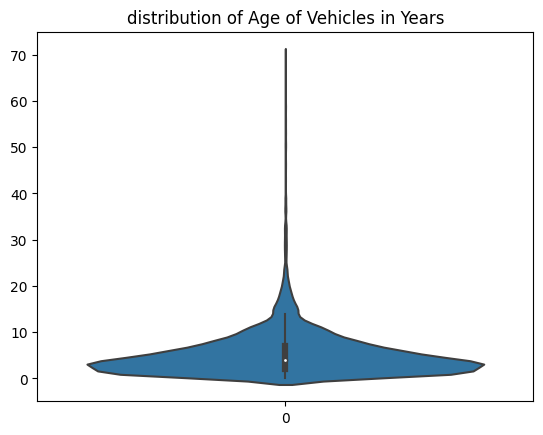

In [ ]:
sns.violinplot(data=used['age_years'])
plt.title('distribution of Age of Vehicles in Years')

<Axes: xlabel='engine_size', ylabel='Density'>

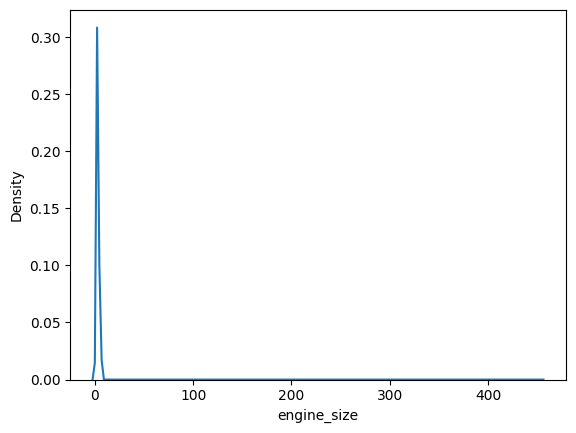

In [ ]:
sns.kdeplot(data=used['engine_size'])

In [ ]:
used['engine_size'].describe(percentiles=[0.1, .25, .50, .75, .95])

count    22353.000000
mean         2.979636
std          5.777195
min          0.000000
10%          1.600000
25%          2.000000
50%          2.500000
75%          3.500000
95%          5.600000
max        454.000000
Name: engine_size, dtype: float64

In [ ]:
large_engine=used[used['engine_size']>used['engine_size'].quantile(0.95)].sort_values('engine_size', ascending=False).head(20)
large_engine

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price,age_years
23080,Chevrolet,Chevelle SS,1970.0,4908.0,454,454.0,Automatic,1.0,Unknown,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,GREEN,MIST GREEN,160000,53
5316,Ford,Thunderbird Base,1966.0,30625.0,390,390.0,Automatic,1.0,Unknown,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,Red,Black,28500,57
1203,Ford,Thunderbird,1964.0,49466.0,390,390.0,Automatic,1.0,Unknown,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,Black,Black,24500,59
14056,Chevrolet,Nova,1976.0,9951.0,350,350.0,Automatic,1.0,Unknown,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,Gray,Blue,15909,47
17694,Ford,Mustang,1965.0,93795.0,289,289.0,Automatic,1.0,Unknown,Unknown,...,0.0,0.0,0.0,1.0,0.0,0.0,White,White,39900,58
10073,Ford,Mustang Mach 1,1970.0,17136.0,95,95.0,4-Speed,0.0,Unknown,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Burgundy,73988,53
18619,Chevrolet,Silverado 2500 H/D Extended Cab,2005.0,90366.0,Vortec 8.1L V-8 engine with 330HP,8.1,Automatic,1.0,Gasoline,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,Dark Charcoal Cloth Interior,Dark Blue Metallic,14995,18
4798,Land,Rover Defender,1992.0,0.0,8,8.0,Automatic,1.0,Unknown,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,Black,Silver Black,89975,31
8264,Chevrolet,Chevelle SS,1969.0,11111.0,7.4L,7.4,Automatic,1.0,Gasoline,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,Black,Red,89900,54
7534,Ford,F-350 155 WB DRW,1990.0,70144.0,7.3L V8 16V OHV Diesel,7.3,Automatic,1.0,Diesel,Rear-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,Gray,Black,19999,33


All the vehicles with huge outliers of engine size are all older models mostly 60s to 70s era muscle cars.  It is clear that the engine size was reported as cubic inches instead of cubic liters.  The best way of dealing with this is to simply convert units to cubic liters using a simple coversion factor of dividing cubic inches by 7.44.

In [ ]:
used['engine_size']=np.where(used['engine_size']>10, used['engine_size']/7.44, used['engine_size']).round(1)

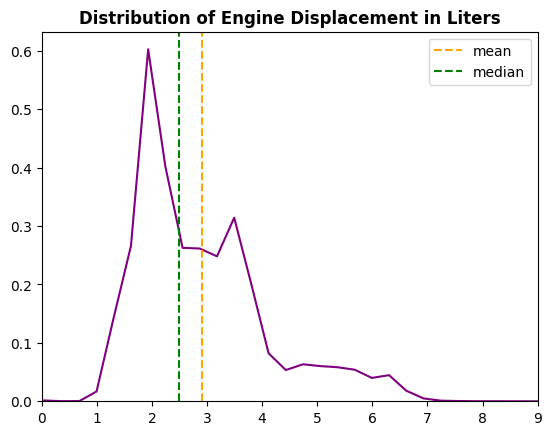

In [ ]:
sns.kdeplot(data=used['engine_size'], color='purple')
plt.xlabel('')
plt.ylabel('')
plt.xlim(0,9)
plt.axvline(x=used['engine_size'].mean(), label='mean', color='orange', linestyle='--')
plt.axvline(x=used['engine_size'].median(), label='median', color='green', linestyle='--')
plt.title('Distribution of Engine Displacement in Liters', weight='bold')
plt.legend()

Text(0.5, 1.0, 'mileage distribution')

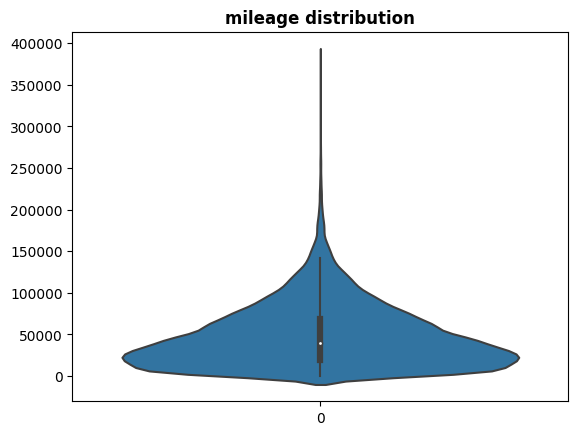

In [ ]:
sns.violinplot(used['mileage'])
plt.title('mileage distribution', weight='bold')


In [ ]:
int64_columns=['year', 'mileage']
used[int64_columns]=used[int64_columns].fillna(0).astype(np.uint32)

In [ ]:
used.iloc[:, 10:33]=used.iloc[:, 10:33].fillna(0).astype(np.uint8)

<ipython-input-94-04e1533e0f85>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  used.iloc[:, 10:33]=used.iloc[:, 10:33].fillna(0).astype(np.uint8)


In [ ]:
used['automatic_transmission']=used['automatic_transmission'].fillna(used['automatic_transmission'].mean()).astype(np.uint8)
used['price']=pd.to_numeric(used['price'], errors='coerce').dropna()
used['price']=used['price'].fillna(used['price'].median()).astype(np.uint32)

In [ ]:
transmission_type=used.groupby('automatic_transmission').agg('mean', numeric_only=True).sort_values('price', ascending=False)
transmission_type

,year,mileage,engine_size,min_mpg,max_mpg,damaged,first_owner,personal_using,turbo,alloy_wheels,...,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,price,age_years
automatic_transmission,,,,,,,,,,,,,,,,,,,,,
1,2018.154650,47079.664917,2.942934,17.459204,23.327279,0.213790,0.527608,0.701469,0.411655,0.909464,...,0.961121,0.717806,0.512138,0.160263,0.404627,0.885142,0.348909,0.498540,37253.205622,4.845806
0,2013.439086,59902.994924,2.473645,18.688832,24.819289,0.248223,0.311675,0.812183,0.327411,0.800000,...,0.822843,0.459391,0.159898,0.019797,0.192893,0.701523,0.414213,0.315736,30830.310660,9.560914


Text(0.5, 1.0, 'Distribution of used car prices')

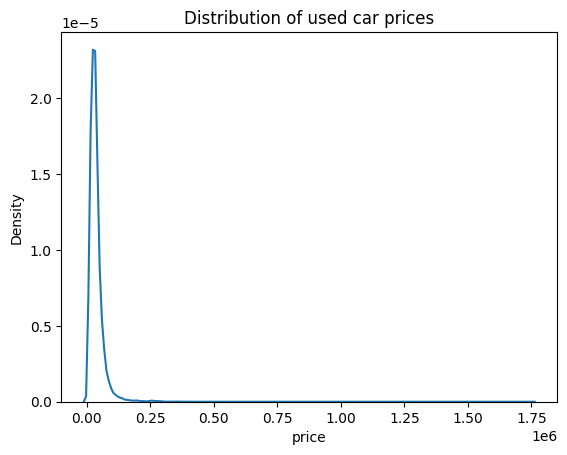

In [ ]:
sns.kdeplot(used['price'])
plt.title('Distribution of used car prices')

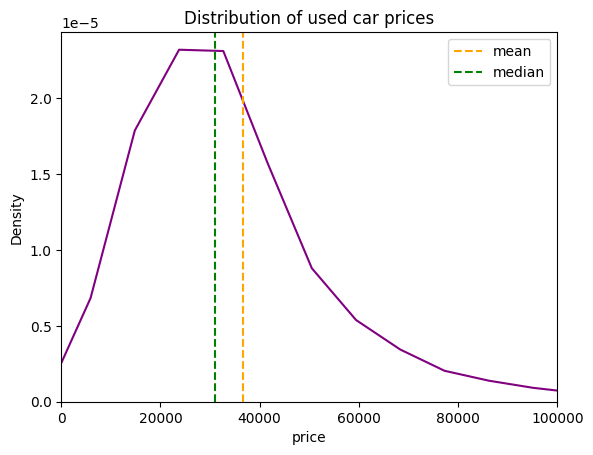

In [ ]:
sns.kdeplot(used['price'], color='purple')
plt.xlim(0, 100000)
plt.axvline(x=used['price'].mean(), label='mean', color='orange', linestyle='--')
plt.axvline(x=used['price'].median(), label='median', color='green', linestyle='--')
plt.title('Distribution of used car prices')
plt.legend()

In [ ]:
used['price'].describe(percentiles=[0.1, .25, .50, .75, .95, 0.99]).apply(lambda x: format(x, 'f'))

count      23884.000000
mean       36723.432423
std        33622.472141
min         1495.000000
10%        12998.000000
25%        20721.500000
50%        30960.000000
75%        43612.250000
95%        79990.000000
99%       146001.060000
max      1750000.000000
Name: price, dtype: object

In [ ]:
expensive_cars=used[used['price']>100000]
expensive_cars.sort_values('price', ascending=False).head(20)

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price,age_years
3156,BMW,750 iL,1996,121043,5.4L V12 24V MPFI SOHC,5.4,5-Speed Automatic,1,Gasoline,Front-wheel Drive,...,1,0,0,0,0,0,Black,Black,1750000,27
14979,Porsche,Carrera GT,2005,2150,5.7L V10 40V MPFI DOHC,5.7,6-Speed Manual,0,Gasoline,Rear-wheel Drive,...,0,0,0,0,0,0,Brown,GT Silver Metallic,1650000,18
16686,Porsche,Carrera GT,2005,9610,5.7L V10 40V MPFI DOHC,5.7,6-Speed Manual,0,Gasoline,Rear-wheel Drive,...,0,0,0,0,0,0,Dark Gray,Red,1599000,18
16584,Porsche,911 GT2 RS,2019,2185,3.8L H6 24V GDI DOHC Twin Turbo,3.8,7-Speed Automatic with Auto-Shift,1,Gasoline,Rear-wheel Drive,...,0,0,1,1,1,0,Black,Red / White / Black,795000,4
8419,Land,Rover Defender 90 First Edition,2021,487,3.0L I6 24V GDI DOHC Turbo,3.0,8-Speed Automatic,1,Gasoline,Four-wheel Drive,...,1,0,0,1,0,0,Ebony,Pangea Green,449000,2
11378,Ford,GT,2005,1892,Gas V8 5.4L/330,5.4,Manual,0,Gasoline,Rear-wheel Drive,...,0,0,0,0,0,0,NaN,White,423998,18
20968,Mercedes-Benz,AMG GT C,2021,2050,"AMG 4L V-8 gasoline direct injection, DOHC, va...",NaN,Automatic,1,Gasoline,Rear-wheel Drive,...,1,0,1,1,1,1,Black,designo Graphite Gray Magno,389900,2
7641,Hyundai,Palisade SEL,2021,67676,3.8L V6 24V GDI DOHC,3.8,8-Speed Automatic,1,Gasoline,Front-wheel Drive,...,0,1,1,1,1,1,Beige,Moonlight Cloud,381611,2
7509,Porsche,911 Speedster,2019,1446,4.0L H6 24V GDI DOHC,4.0,6-Speed Manual,0,Gasoline,Rear-wheel Drive,...,0,0,1,1,1,0,Black,Gray,364900,4
1358,Alfa,Romeo 8c Competizione,2008,8843,4.7L V8,4.7,6-Speed Automatic,1,Gasoline,Rear-wheel Drive,...,0,0,0,0,0,0,Nero,Nero,350000,15


In [ ]:
expensive_cars.shape[0]

614

Text(0.5, 0, '')

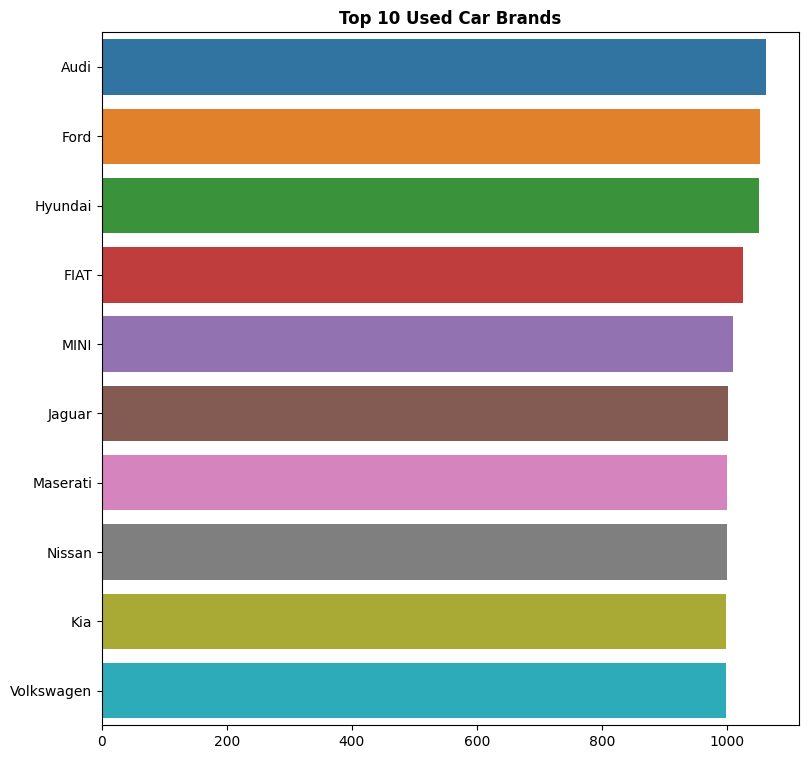

In [ ]:
plt.figure(figsize=(9,9))
brand=used['brand'].value_counts().sort_values(ascending=False).head(10)
sns.barplot(x=brand, y=brand.index)
plt.title('Top 10 Used Car Brands', weight='bold')
plt.xlabel('')

In [ ]:
brand_group=used.groupby('brand').mean(numeric_only=True)
brand_group

,year,mileage,engine_size,automatic_transmission,min_mpg,max_mpg,damaged,first_owner,personal_using,turbo,...,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,price,age_years
brand,,,,,,,,,,,,,,,,,,,,,
Alfa,2019.312109,29461.248434,2.042542,0.975992,20.411273,26.898747,0.137787,0.660752,0.734864,0.922756,...,0.975992,0.957203,0.881002,0.000000,0.623173,0.938413,0.432150,0.477035,34653.363257,3.687891
Audi,2018.697084,41122.784572,2.658667,0.975541,17.362183,23.753528,0.217310,0.539040,0.737535,0.692380,...,0.984008,0.968956,0.610536,0.095014,0.397930,0.940734,0.212606,0.742239,43563.779868,4.302916
BMW,2018.326596,41608.494681,2.947539,0.961702,16.297872,22.773404,0.247872,0.493617,0.732979,0.832979,...,0.951064,0.863830,0.900000,0.043617,0.405319,0.903191,0.113830,0.567021,47158.526596,4.679787
Cadillac,2017.702513,44526.521608,3.976404,0.961809,14.466332,20.606030,0.227136,0.500503,0.658291,0.333668,...,0.917588,0.882412,0.867337,0.262312,0.561809,0.833166,0.153769,0.346734,44067.065327,5.297487
Chevrolet,2016.072432,63951.342703,4.734676,0.939459,12.058378,16.642162,0.246486,0.446486,0.562162,0.155676,...,0.887568,0.470270,0.337297,0.254054,0.478919,0.769730,0.470270,0.241081,35544.892973,6.927568
FIAT,2015.690058,57827.292398,1.546981,0.714425,23.084795,30.274854,0.237817,0.290448,0.779727,0.399610,...,0.986355,0.315789,0.088694,0.000000,0.048733,0.958090,0.604288,0.301170,15291.021442,7.309942
Ford,2017.002849,61116.902184,3.839307,0.888889,12.803419,16.987654,0.207977,0.512821,0.563153,0.541311,...,0.912631,0.394112,0.246914,0.250712,0.360874,0.773029,0.410256,0.333333,35976.501425,5.997151
Honda,2017.714577,57912.104995,2.490276,0.900102,23.363914,29.959225,0.251784,0.587156,0.811417,0.198777,...,0.951070,0.563710,0.364934,0.222222,0.500510,0.874618,0.439348,0.524975,25962.863405,5.285423
Hyundai,2018.888677,49105.247383,2.440870,0.902950,19.500476,25.074215,0.221694,0.555661,0.721218,0.187441,...,0.963844,0.450048,0.187441,0.141770,0.583254,0.875357,0.470029,0.530923,25244.368221,4.111323


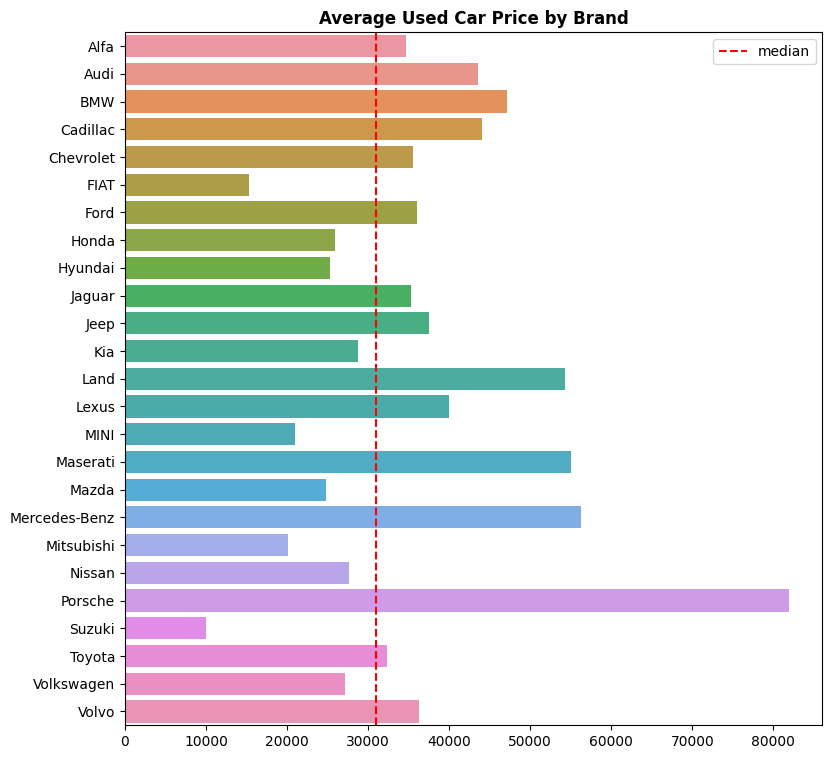

In [ ]:
plt.figure(figsize=(9,9))
sns.barplot(data=brand_group, y=brand_group.index, x='price', errorbar=None)
plt.ylabel('')
plt.xlabel('')
plt.title('Average Used Car Price by Brand', weight='bold')
plt.axvline(x=used['price'].median(), label='median', color='red', linestyle='--')
plt.legend()

Text(0.5, 1.0, 'Average Used Car Milieage by Brand')

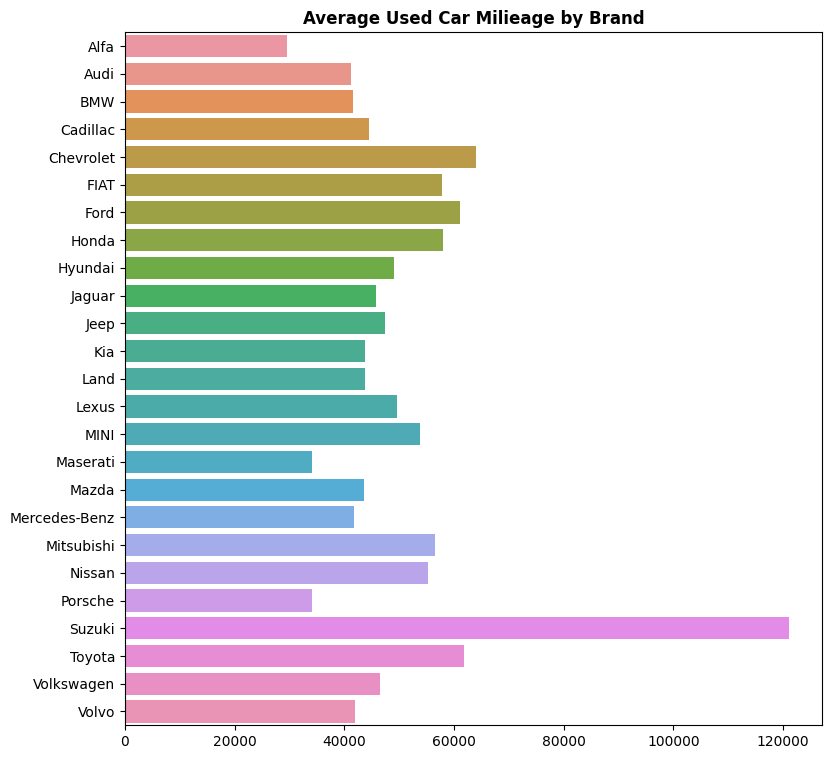

In [ ]:
plt.figure(figsize=(9,9))
sns.barplot(data=brand_group, y=brand_group.index, x='mileage', errorbar=None)
plt.ylabel('')
plt.xlabel('')
plt.title('Average Used Car Milieage by Brand', weight='bold')

In [ ]:
used['transmission'].value_counts().head(20)

8-Speed Automatic                    6742
6-Speed Automatic                    3951
Automatic                            3431
Automatic CVT                        1985
9-Speed Automatic                    1281
7-Speed Automatic with Auto-Shift     890
10-Speed Automatic                    823
6-Speed Manual                        749
5-Speed Automatic                     599
1-Speed Automatic                     468
7-Speed Automatic                     466
5-Speed Manual                        325
4-Speed Automatic                     272
6-Speed Automatic with Auto-Shift     262
8-Speed Automatic with Auto-Shift     237
Manual                                224
2-Speed Automatic                      66
8-Speed Automatic with Tiptronic       66
A/T                                    42
CVT                                    41
Name: transmission, dtype: int64

In [ ]:
transmission_dict={'8-Speed Automatic':'eight_speed_automatic', '6-Speed Automatic':'six_speed_automatic', '7-Speed Automatic with Auto-Shift':'seven_speed_automatic', '10-Speed Automatic':'ten_speed_automatic',
                   '5-Speed Automatic':'five_speed_automatic', '1-Speed Automatic':'one_speed_automatic', '7-Speed Automatic':'seven_speed_automatic', '5-Speed Manual':'manual', '4-Speed Automatic':'four_speed_automatic'
                   ,'6-Speed Automatic with Auto-Shift':'six_speed_automatic', '8-Speed Automatic with Auto-Shift': 'eight_speed_automatic', 'Manual': 'manual', 'CVT': 'automatic_cvt', 'Automatic CVT':'automatic_cvt'}

used['transmission']=used['transmission'].map(transmission_dict)
used['transmission'].value_counts().head(20)

eight_speed_automatic    6979
six_speed_automatic      4213
automatic_cvt            2026
seven_speed_automatic    1356
ten_speed_automatic       823
five_speed_automatic      599
manual                    549
one_speed_automatic       468
four_speed_automatic      272
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Count of Transmissions')

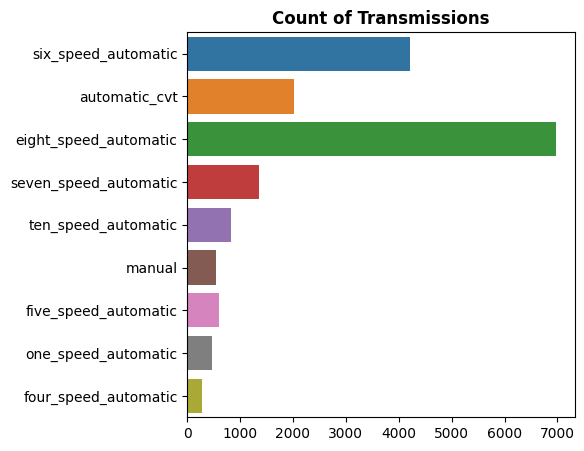

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=used['transmission'], y=used['transmission'].index )
plt.ylabel('')
plt.xlabel('')
plt.title('Count of Transmissions', weight='bold')

In [ ]:
used['engine'].unique().shape[0]

1289

In [ ]:
used['model'].unique().shape[0]

3789

In [ ]:
used['fuel_type'].value_counts()


Gasoline                  21534
Hybrid                     1053
Electric                    611
Diesel                      322
E85 Flex Fuel               270
Unknown                      90
B                             1
flex_fuel                     1
Premium Unleaded              1
Compressed Natural Gas        1
Name: fuel_type, dtype: int64

In [ ]:
top_fuel=used['fuel_type'].value_counts().head(5).index

In [ ]:
used_modif=used.copy()
used_modif['fuel_type']=used_modif['fuel_type'].apply(lambda x: 'other' if x not in top_fuel else x).str.lower()
used_modif['fuel_type'].value_counts()

gasoline         21534
hybrid            1053
electric           611
diesel             322
e85 flex fuel      270
other               94
Name: fuel_type, dtype: int64

Text(0.5, 1.0, 'Count of Fuel Type')

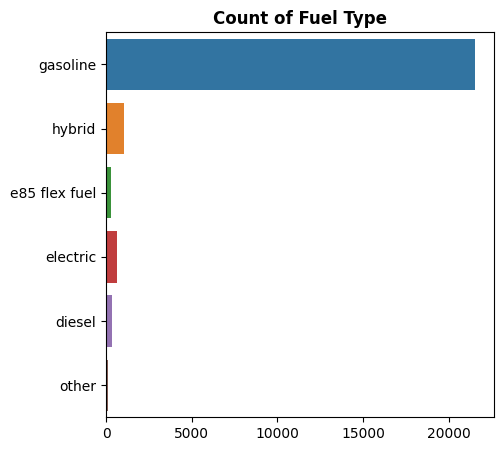

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=used_modif['fuel_type'], y=used_modif['fuel_type'].index )
plt.ylabel('')
plt.xlabel('')
plt.title('Count of Fuel Type', weight='bold')

In [ ]:
used_modif['drivetrain']=used_modif['drivetrain'].str.lower()
used_modif['drivetrain'].value_counts()

four-wheel drive     13530
front-wheel drive     6448
rear-wheel drive      3799
unknown                106
2wd                      1
Name: drivetrain, dtype: int64

Text(0.5, 1.0, 'Count of Fuel Type')

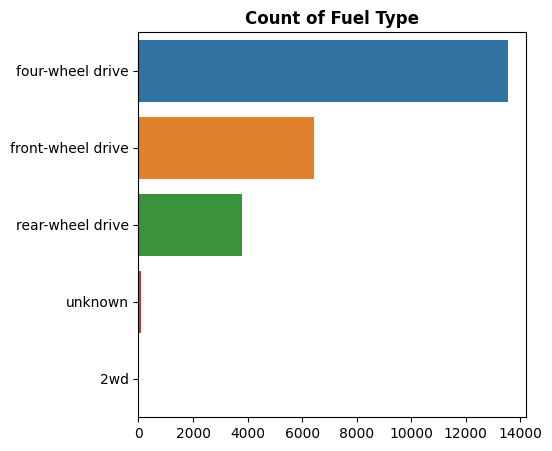

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data=used_modif['drivetrain'], y=used_modif['drivetrain'].index )
plt.ylabel('')
plt.xlabel('')
plt.title('Count of Fuel Type', weight='bold')

In [ ]:
premium_brand=brand_group[brand_group['price']>brand_group['price'].median()].index
premium_brand

Index(['Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Ford', 'Jeep', 'Land', 'Lexus',
       'Maserati', 'Mercedes-Benz', 'Porsche', 'Volvo'],
      dtype='object', name='brand')

In [ ]:
used_modif['premium_brand']=used_modif['brand'].apply(lambda x: 1 if x in premium_brand else 0).astype(np.uint8)
used_modif['premium_brand'].value_counts()

0    12030
1    11854
Name: premium_brand, dtype: int64

In [ ]:
used_modif=used_modif.drop(columns=['model', 'engine', 'brand'])
used_modif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23884 entries, 0 to 23886
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         23884 non-null  uint32 
 1   mileage                      23884 non-null  uint32 
 2   engine_size                  22353 non-null  float64
 3   transmission                 17285 non-null  object 
 4   automatic_transmission       23884 non-null  uint8  
 5   fuel_type                    23884 non-null  object 
 6   drivetrain                   23884 non-null  object 
 7   min_mpg                      23884 non-null  uint8  
 8   max_mpg                      23884 non-null  uint8  
 9   damaged                      23884 non-null  uint8  
 10  first_owner                  23884 non-null  uint8  
 11  personal_using               23884 non-null  uint8  
 12  turbo                        23884 non-null  uint8  
 13  alloy_wheels    

In [ ]:
used_modif['interior_color'].value_counts().head(30)

Black                9258
Gray                 1175
Ebony                 851
Charcoal              818
Jet Black             775
Carbon Black          499
Titan Black           479
Beige                 478
Nero                  408
Tan                   296
Ebony / Ebony         294
Red                   284
Brown                 190
Global Black          178
Graphite              139
Blond                 129
Parchment             109
Black / Red           109
Charcoal Black         97
Ivory                  77
Ash                    72
Red / Black            70
Jet                    63
Amber                  59
Rioja Red              59
Light Gray             57
Medium Earth Gray      54
Cuoio                  53
Black / Gray           52
Black Onyx             51
Name: interior_color, dtype: int64

In [ ]:
common_int=used_modif['interior_color'].value_counts().head(20).index
used_modif['uncommon_int_color']=used_modif['interior_color'].apply(lambda x: 0 if x in common_int else 1).astype(np.uint8)

In [ ]:
used_modif['exterior_color'].value_counts().head(50)

Black                                 1729
White                                 1321
Gray                                   801
Silver                                 631
Blue                                   497
Red                                    424
Fuji White                             338
Santorini Black                        257
Black Raven                            223
Bright White Clearcoat                 191
Rosso                                  181
Alfa White                             174
Summit White                           169
Deep Black Pearl Effect                168
Pure White                             168
Jet Black Mica                         153
Crystal White Tri-Coat                 148
Glacier White Metallic                 148
Mythos Black Metallic                  146
Alpine White                           144
Gun Metallic                           142
Bianco                                 142
Snow White Pearl                       128
Black Sapph

In [ ]:
uncommon_ext=used_modif['exterior_color'].value_counts().head(50).index
used_modif['uncommon_ext_color']=used_modif['exterior_color'].apply(lambda x: 0 if x in uncommon_ext else 1).astype(np.uint8)

In [ ]:
used_modif=used_modif.drop(columns=['interior_color', 'exterior_color'])
used_modif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23884 entries, 0 to 23886
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         23884 non-null  uint32 
 1   mileage                      23884 non-null  uint32 
 2   engine_size                  22353 non-null  float64
 3   transmission                 17285 non-null  object 
 4   automatic_transmission       23884 non-null  uint8  
 5   fuel_type                    23884 non-null  object 
 6   drivetrain                   23884 non-null  object 
 7   min_mpg                      23884 non-null  uint8  
 8   max_mpg                      23884 non-null  uint8  
 9   damaged                      23884 non-null  uint8  
 10  first_owner                  23884 non-null  uint8  
 11  personal_using               23884 non-null  uint8  
 12  turbo                        23884 non-null  uint8  
 13  alloy_wheels    

In [ ]:
used_modif['uncommon_ext_color'].value_counts()

1    12847
0    11037
Name: uncommon_ext_color, dtype: int64

In [ ]:
clean_used=pd.get_dummies(used_modif)
clean_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23884 entries, 0 to 23886
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                23884 non-null  uint32 
 1   mileage                             23884 non-null  uint32 
 2   engine_size                         22353 non-null  float64
 3   automatic_transmission              23884 non-null  uint8  
 4   min_mpg                             23884 non-null  uint8  
 5   max_mpg                             23884 non-null  uint8  
 6   damaged                             23884 non-null  uint8  
 7   first_owner                         23884 non-null  uint8  
 8   personal_using                      23884 non-null  uint8  
 9   turbo                               23884 non-null  uint8  
 10  alloy_wheels                        23884 non-null  uint8  
 11  adaptive_cruise_control             23884

In [ ]:
col_to_drop=['fuel_type_other', 'drivetrain_unknown', 'drivetrain_2wd', 'year']
clean_used=clean_used.drop(columns=col_to_drop)

In [ ]:
clean_used['engine_size']=clean_used['engine_size'].fillna(clean_used['engine_size'].median())

In [ ]:
clean_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23884 entries, 0 to 23886
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   mileage                             23884 non-null  uint32 
 1   engine_size                         23884 non-null  float64
 2   automatic_transmission              23884 non-null  uint8  
 3   min_mpg                             23884 non-null  uint8  
 4   max_mpg                             23884 non-null  uint8  
 5   damaged                             23884 non-null  uint8  
 6   first_owner                         23884 non-null  uint8  
 7   personal_using                      23884 non-null  uint8  
 8   turbo                               23884 non-null  uint8  
 9   alloy_wheels                        23884 non-null  uint8  
 10  adaptive_cruise_control             23884 non-null  uint8  
 11  navigation_system                   23884

In [ ]:
correlations=abs(clean_used.corr())
correlations=correlations.sort_values('price', ascending=False)
price_correlations=correlations['price']
price_correlations

price                                 1.000000
mileage                               0.396510
premium_brand                         0.313898
navigation_system                     0.296711
drivetrain_front-wheel drive          0.284065
age_years                             0.257236
engine_size                           0.225940
memory_seat                           0.223216
drivetrain_four-wheel drive           0.187825
apple_car_play/android_auto           0.175072
transmission_six_speed_automatic      0.170598
damaged                               0.160457
first_owner                           0.159941
leather_seats                         0.159762
power_liftgate                        0.158256
min_mpg                               0.139409
max_mpg                               0.133858
turbo                                 0.130879
transmission_automatic_cvt            0.119376
adaptive_cruise_control               0.116944
sunroof/moonroof                      0.112438
transmission_

Text(0.5, 0, '')

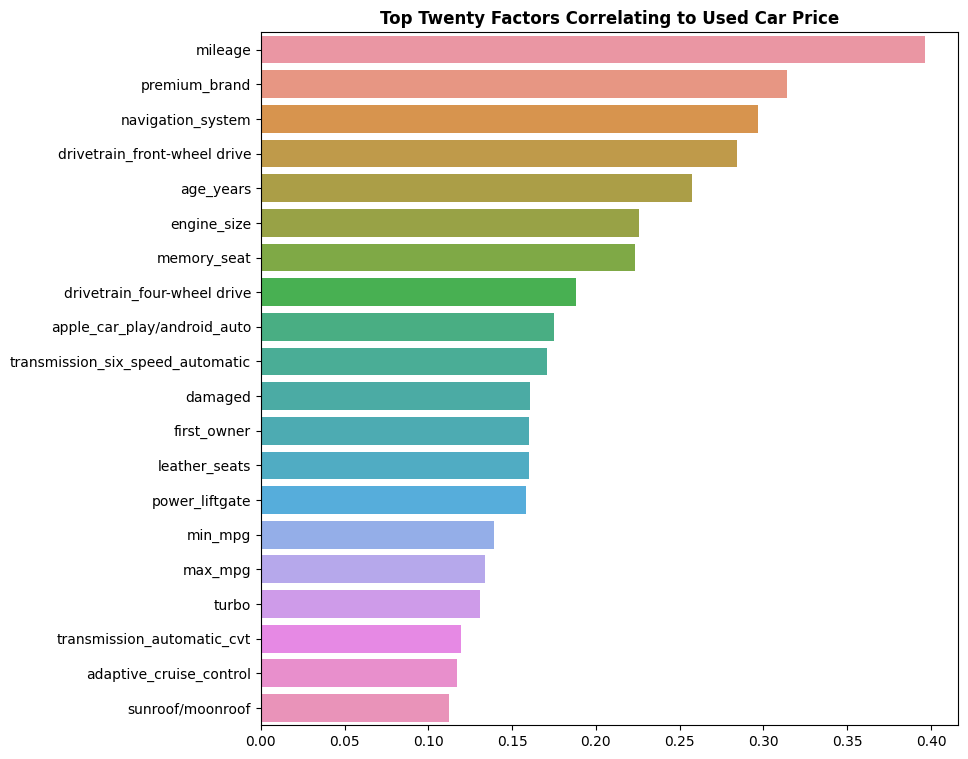

In [ ]:
# plot top twenty factors
plt.figure(figsize=(9,9))
sns.barplot(y=price_correlations.iloc[1:].head(20).index, x=price_correlations.iloc[1:].head(20))
plt.title('Top Twenty Factors Correlating to Used Car Price', weight='bold')
plt.xlabel('')

In [ ]:
top_corr=price_correlations.iloc[1:21].index
top_corr

Index(['mileage', 'premium_brand', 'navigation_system',
       'drivetrain_front-wheel drive', 'age_years', 'engine_size',
       'memory_seat', 'drivetrain_four-wheel drive',
       'apple_car_play/android_auto', 'transmission_six_speed_automatic',
       'damaged', 'first_owner', 'leather_seats', 'power_liftgate', 'min_mpg',
       'max_mpg', 'turbo', 'transmission_automatic_cvt',
       'adaptive_cruise_control', 'sunroof/moonroof'],
      dtype='object')

In [ ]:
X=clean_used.drop(columns='price')
y=clean_used['price']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=78)


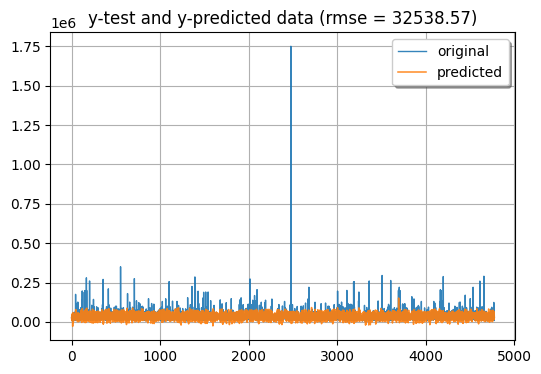

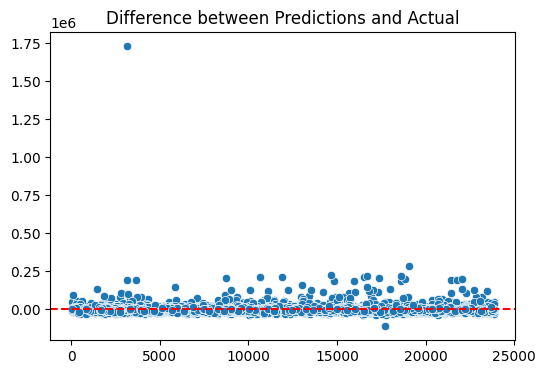

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)

rmse=mean_squared_error(y_test, prediction, squared=False)
graph_test_accuracy(y_test, prediction, rmse)

In [ ]:
new_used=clean_used[clean_used['price']<1000000]

In [ ]:
X=new_used.drop(columns='price')
y=new_used['price']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=78)

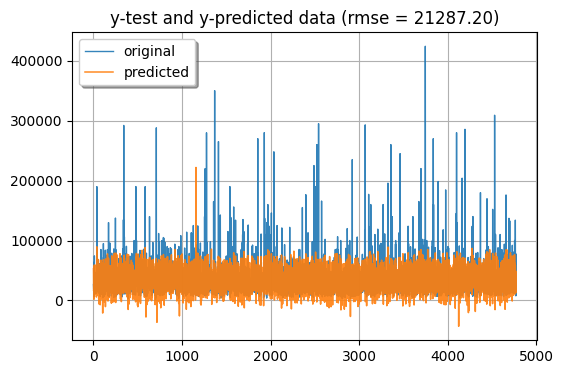

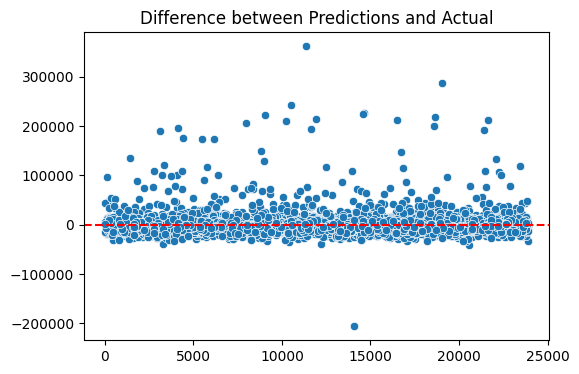

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)

rmse=mean_squared_error(y_test, prediction, squared=False)
graph_test_accuracy(y_test, prediction, rmse)

In [ ]:
linear_coef=pd.DataFrame(model.coef_, index=X.columns)
linear_coef

,0
mileage,-0.200028
engine_size,4317.004338
automatic_transmission,787.378178
min_mpg,149.438116
max_mpg,-117.691094
damaged,-3141.817453
first_owner,-366.896363
personal_using,1281.947595
turbo,4834.879256
alloy_wheels,-3051.587483


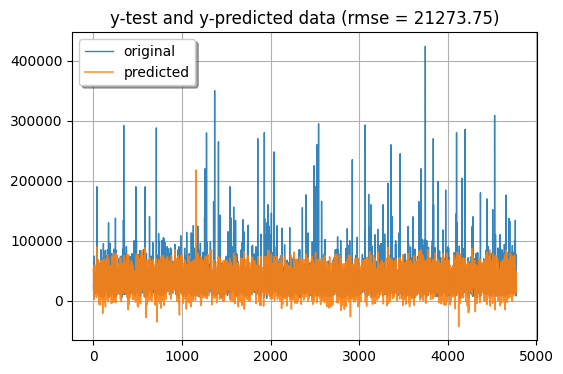

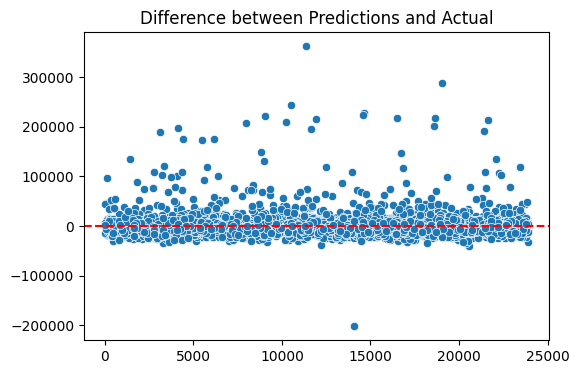

In [ ]:
# initialize RidgeCV object with default parameters
model=RidgeCV(alphas=np.linspace(0.1,12, num=100), alpha_per_target=True)

# fit model with training data
model.fit(X_train , y_train)

# make predictions and calculate mse
prediction=model.predict(X_test)
rmse=mean_squared_error(y_test, prediction, squared=False)

# plot results
graph_test_accuracy(y_test, prediction, rmse)

In [ ]:
linear_coef=pd.DataFrame(model.coef_, index=X.columns)
linear_coef

,0
mileage,-0.201860
engine_size,4320.546566
automatic_transmission,643.025817
min_mpg,145.823406
max_mpg,-115.212492
damaged,-3155.837854
first_owner,-334.134442
personal_using,1253.819453
turbo,4837.712260
alloy_wheels,-3147.352426


In [ ]:
X_corr=X[top_corr]
X_train, X_test, y_train, y_test=train_test_split(X_corr, y, test_size=0.2, random_state=78)

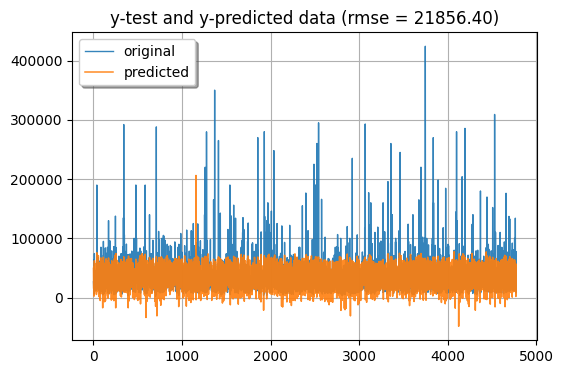

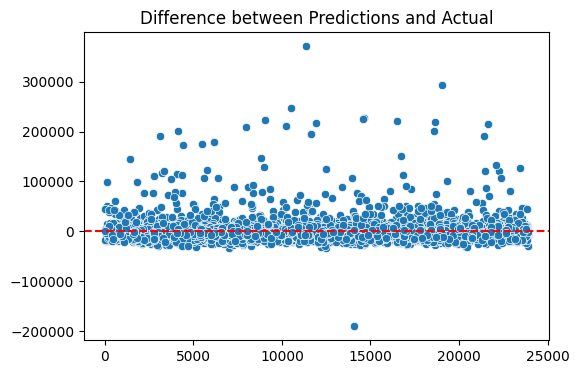

In [ ]:
# initialize RidgeCV object with default parameters
model=RidgeCV(alphas=np.linspace(0.1,12, num=100), alpha_per_target=True)

# fit model with training data
model.fit(X_train , y_train)

# make predictions and calculate mse
prediction=model.predict(X_test)
rmse=mean_squared_error(y_test, prediction, squared=False)

# plot results
graph_test_accuracy(y_test, prediction, rmse)

In [ ]:
# top_corr=price_correlations.iloc[1:21].index

rmse_corr=[]

for i in range(3,47,3):
  top_corr=price_correlations.iloc[1:i].index
  X_corr=X[top_corr]
  X_train, X_test, y_train, y_test=train_test_split(X_corr, y, test_size=0.2, random_state=78)
  model=LinearRegression()
  model.fit(X_train , y_train)
  prediction=model.predict(X_test)
  rmse_corr.append([i, mean_squared_error(y_test, prediction, squared=False)])

In [ ]:
rmse_corr

[[3, 23282.961795643696],
 [6, 22576.50448994286],
 [9, 22083.90720984018],
 [12, 21956.032074578776],
 [15, 21955.2495135701],
 [18, 21888.93485951742],
 [21, 21856.151070215175],
 [24, 21758.573940858758],
 [27, 21628.025329325013],
 [30, 21601.03421227243],
 [33, 21571.394642275893],
 [36, 21544.235674108353],
 [39, 21525.034074305302],
 [42, 21417.608480937666],
 [45, 21395.52024967081]]

In [ ]:
rmse_df=pd.DataFrame(rmse_corr, columns=['num_features', 'rmse'])

Text(0.5, 1.0, 'Root Mean Squared Error vs Number of Features')

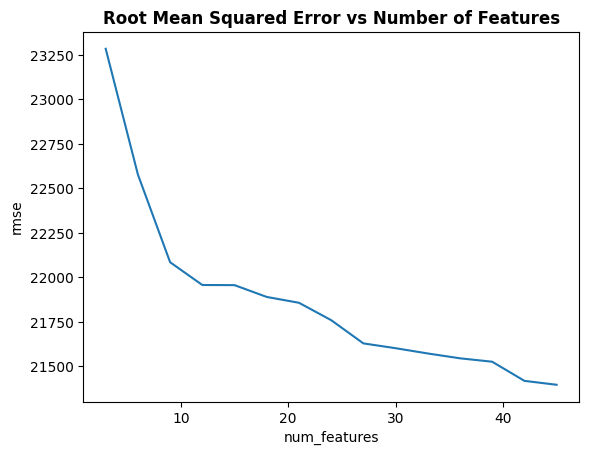

In [ ]:
sns.lineplot(data=rmse_df, x='num_features', y='rmse')
plt.title('Root Mean Squared Error vs Number of Features', weight='bold')

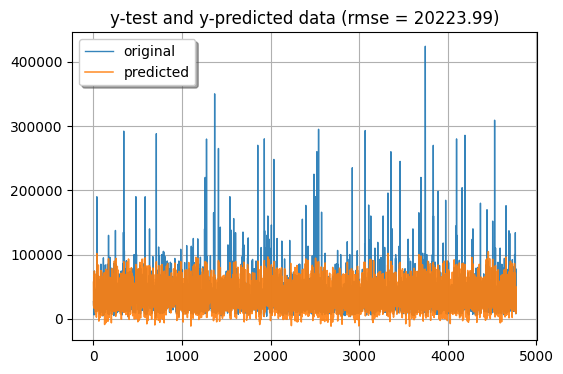

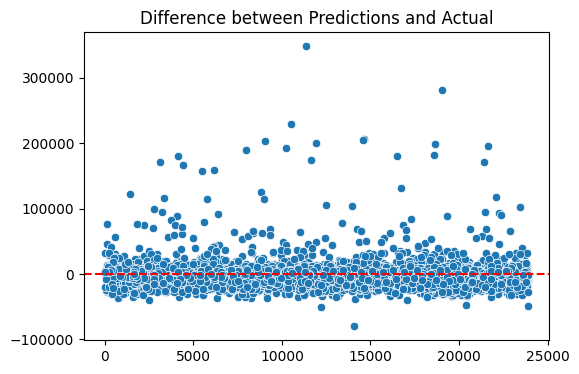

In [ ]:
# initialize spline transformer with default parameters
spline = SplineTransformer()

# fit train and test data to spline transformer
spline_X_train = spline.fit_transform(X_train)
spline_X_test = spline.fit_transform(X_test)

model=RidgeCV(alphas=np.linspace(0.1,10, num=100), alpha_per_target=True)

# fit spline transformed predictor variables to model
model.fit(spline_X_train, y_train)

# make predictions, calculate mse and graph results
prediction=model.predict(spline_X_test)
rmse=mean_squared_error(y_test, prediction, squared=False)
graph_test_accuracy(y_test, prediction, rmse)

In [ ]:
# empty list to contain mse results for different knots/degree values
knot_mse=[]

# loop through 2 to 5 degrees
for degree in range(2,5):
  # loop through 2 to 14 knots
  for knot in range(2,5):
    # generate spline transformer object with varying degrees/knot values
    spline=SplineTransformer(degree=degree, n_knots=knot)
    # fit train and test data to spline transfomer
    spline_X_train = spline.fit_transform(X_train)
    spline_X_test = spline.fit_transform(X_test)
    # generate RidgeCV object
    model=RidgeCV(alphas=np.linspace(0.1,12, num=100), alpha_per_target=True)
    # fit transformed data to model
    model.fit(spline_X_train, y_train)
    # make predictions with transformed data
    prediction=model.predict(spline_X_test)
    rmse=mean_squared_error(y_test, prediction, squared=False)
    # append degree, knot and mse to list
    knot_mse.append([degree, knot, rmse])

In [ ]:
# create dataframe from knot_mse list
knot_df=pd.DataFrame(knot_mse, columns=['degree', 'n_knots', 'mse'])
# sort values by mse
knot_df=knot_df.sort_values('mse')
knot_df.head(10)

,degree,n_knots,mse
8,4,4,20296.059372
5,3,4,20326.122207
4,3,3,20340.199633
2,2,4,20397.503911
7,4,3,20425.986733
3,3,2,20444.911858
6,4,2,20586.484928
1,2,3,20608.586246
0,2,2,20621.702642


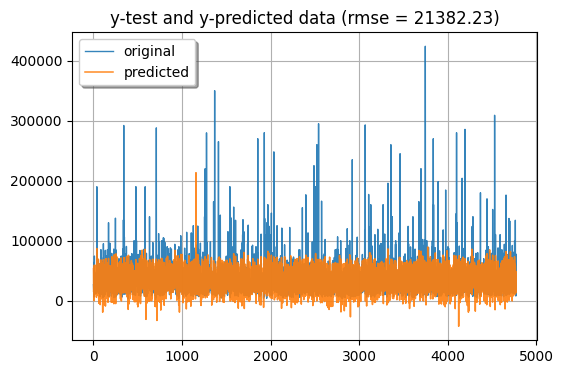

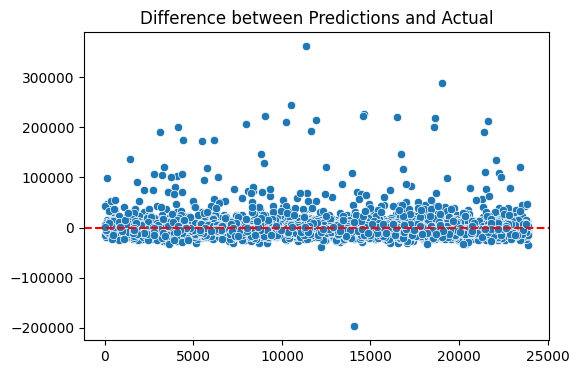

In [ ]:
# initialize RidgeCV object with default parameters
model=BayesianRidge()

# fit model with training data
model.fit(X_train , y_train)

# make predictions and calculate mse
prediction=model.predict(X_test)
rmse=mean_squared_error(y_test, prediction, squared=False)

# plot results
graph_test_accuracy(y_test, prediction, rmse)

In [ ]:

# set standard_deviation range to keep to 4.  Only eliminate extreme outliers.
standard_deviations=4

# lamda function that removes any row with values outside of 4 deviations from the mean
mean=clean_used['price'].mean()
std=clean_used['price'].std()

no_outliers=clean_used[clean_used.apply(lambda x: np.abs(x - mean) / std < standard_deviations)
   .all(axis=1)]

# calculate percentage of dataset left after removal of outliers
percent_kept=no_outliers.shape[0]/clean_used.shape[0]*100
print(f'Percent of dataset left {percent_kept:.2f}%')



Percent of dataset left 98.38%


In [ ]:
X_out=no_outliers.drop(columns='price')
y_out=no_outliers['price']

X_train, X_test, y_train, y_test=train_test_split(X_out, y_out, test_size=0.2, random_state=78)

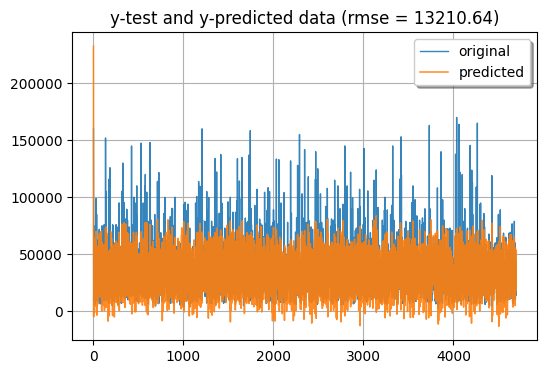

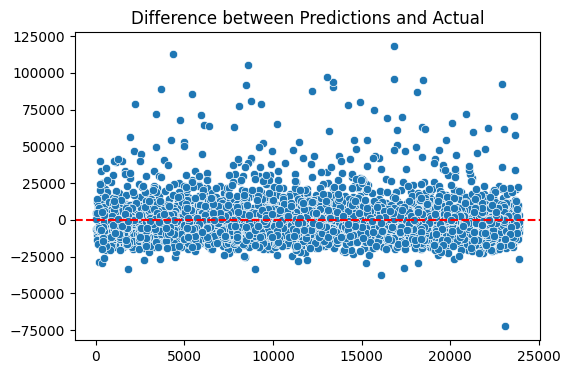

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)
prediction=model.predict(X_test)

rmse=mean_squared_error(y_test, prediction, squared=False)
graph_test_accuracy(y_test, prediction, rmse)

In [ ]:
linear_coef=pd.DataFrame(model.coef_, index=X.columns)
print(f'Intercept is {model.intercept_:.2f}')
linear_coef

Intercept is 53414.50


,0
mileage,-0.208068
engine_size,3849.699297
automatic_transmission,-744.792766
min_mpg,115.436207
max_mpg,-113.844248
damaged,-2404.623901
first_owner,-290.507637
personal_using,935.564028
turbo,4142.627172
alloy_wheels,-2903.640891
